In [1]:
import os
import numpy as np 
from PIL import Image
def LoadDir(dirname):
    imgs = []
    for imgname in os.listdir(dirname):
        img = Image.open(os.path.join(dirname, imgname))
        img = img.convert('LA')  # conver to grayscale
        img = img.resize([20, 20])
        img = np.squeeze(np.array(img)[:, :, 0])
        imgs.append(img)
    return np.array(imgs)
train_imgs = LoadDir('galaxy/train')
print (train_imgs.shape)
val_imgs = LoadDir('galaxy/val')
print (val_imgs.shape)
test_imgs = LoadDir('galaxy/test')
print (test_imgs.shape)

(40872, 20, 20)
(10382, 20, 20)
(10324, 20, 20)


reshape imgs from 3 dimension into 2 dimension

In [80]:
X_train = train_imgs.reshape(train_imgs.shape[0],(train_imgs.shape[1]*train_imgs.shape[2]))
#X_train = np.true_divide(X_train, 255)
X_valid = val_imgs.reshape(val_imgs.shape[0],(val_imgs.shape[1]*val_imgs.shape[2]))
#X_valid = np.true_divide(X_valid, 255)
X_test = test_imgs.reshape(test_imgs.shape[0],(test_imgs.shape[1]*test_imgs.shape[2]))
#X_test = np.true_divide(X_test, 255)

In [24]:
def MSE(predict,X):          
    return np.sum((predict-X)**2)/(X.shape[0]*X.shape[1])

In [36]:
def MSE2(predict,x):          
    return np.sum((predict-x)**2)/(len(x))

In [32]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
encode = pca.fit_transform(X_valid)
print('encode:',encode.shape)
decode1 = pca.inverse_transform(encode)
print('decode:',decode.shape)

encode: (10382, 25)
decode: (10324, 400)


In [33]:
error = MSE(decode1,X_valid)
print('PCA MSE for validation data set:',error)

PCA MSE for validation data set: 71.2295039754151


In [34]:
pca = PCA(n_components=25)
encode = pca.fit_transform(X_test)
decode2 = pca.inverse_transform(encode)
error = MSE(decode2,X_test)
print('PCA MSE for test data set:',error)

PCA MSE for test data set: 71.42627571656304


Auto Encoder

In [81]:
X_train = np.true_divide(X_train, 255)
AF = ['identity', 'logistic', 'tanh', 'relu']
from sklearn.neural_network import MLPRegressor
for i in range(4):
    clf = MLPRegressor(activation=AF[i],learning_rate_init=0.005,alpha=0.005,hidden_layer_sizes=(100,25,100), random_state=1,max_iter=10000, warm_start=True)
    clf.fit(X_train,X_train)
    predict1 = clf.predict(X_valid/255)
    error = MSE(predict1*255,X_valid)
    print(AF[i],'MSE:',error)

identity MSE: 76.06715422249013
logistic MSE: 120.53264658529928
tanh MSE: 73.18321353344234
relu MSE: 89.59485508887316


In [59]:
lr=[1e-3,5e-3,1e-2,5e-2,1e-1]
for i in range(5):
    clf = MLPRegressor(activation='tanh',learning_rate_init=lr[i],alpha=0.005,hidden_layer_sizes=(100,25,100), random_state=1,max_iter=1000, warm_start=True)
    clf.fit(X_train,X_train)
    predict1 = clf.predict(X_valid/255)
    error = MSE(predict1*255,X_valid)
    print('lr:',lr[i],'MSE:',error)

lr: 0.001 MSE: 75.24819075460083
lr: 0.005 MSE: 73.18321353344234
lr: 0.01 MSE: 75.53143681104125
lr: 0.05 MSE: 1329.7798700292522
lr: 0.1 MSE: 4878.683480024894


In [61]:
reg=[1e-3,5e-3,1e-2,5e-2,1e-1]
for i in range(5):
    clf = MLPRegressor(activation='tanh',learning_rate_init=5e-3,alpha=reg[i],hidden_layer_sizes=(100,25,100), random_state=1,max_iter=1000, warm_start=True)
    clf.fit(X_train,X_train)
    predict1 = clf.predict(X_valid/255)
    error = MSE(predict1*255,X_valid)
    print('alpha:',lr[i],'MSE:',error)

alpha: 0.001 MSE: 73.39882906863758
alpha: 0.005 MSE: 73.18321353344234
alpha: 0.01 MSE: 78.66879537059737
alpha: 0.05 MSE: 73.62521982367241
alpha: 0.1 MSE: 73.96199240168848


In [65]:
layer_size=[(25),(100,25,100),(100,50,25,50,100)]
for i in range(3):
    clf = MLPRegressor(activation='tanh',learning_rate_init=5e-3,alpha=5e-3,hidden_layer_sizes=layer_size[i], random_state=1,max_iter=1000, warm_start=True)
    clf.fit(X_train,X_train)
    predict1 = clf.predict(X_valid/255)
    error = MSE(predict1*255,X_valid)
    print('hidden layer size:',layer_size[i],'MSE:',error)

hidden layer size: 25 MSE: 73.3244017966915
hidden layer size: (100, 25, 100) MSE: 73.18321353344234
hidden layer size: (100, 50, 25, 50, 100) MSE: 74.76823645355981


In [82]:
# choose tanh activation function, learning rate=0.005, alpha=0.005, hidden_layer_size=(100,25,100)
clf = MLPRegressor(activation='tanh',learning_rate_init=0.005,alpha=0.005,hidden_layer_sizes=(100,25,100), random_state=1,max_iter=1000, warm_start=True)
clf.fit(X_train,X_train)
predict1 = clf.predict(X_valid/255)
error = MSE(predict1*255,X_valid)
print('AE MSE for validation data set:',error)

AE MSE for validation data set: 73.18321353344234


In [83]:
predict2 = clf.predict(X_test/255)
error = MSE(predict2*255,X_test)
print('AE MSE for test test set:',error)

AE MSE for test test set: 73.32171389584842


PCA vs Auto Encoder:

PCA MSE for validation data set: 71.2295039754151

AE MSE for validation data set: 73.18321353344234

PCA MSE for test data set: 71.42627571656304

AE MSE for test test set: 73.32171389584842

Conclusion: PCA tends to work better. 
However, the performance of Auto Encoder is close to that of PCA.

compare PCA and auto-encoder:

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
AE_better = 0
PCA_better = 0
for i in range(X_test.shape[0]):
    if MSE2(decode2[i,:],X_test[i,:])>MSE2(predict2[i,:]*255,X_test[i,:]):
        AE_better=i
        
for i in range(X_test.shape[0]):
    if MSE2(decode2[i,:],X_test[i,:])<MSE2(predict2[i,:]*255,X_test[i,:]):
        PCA_better=i
    


Auto Encoder better:



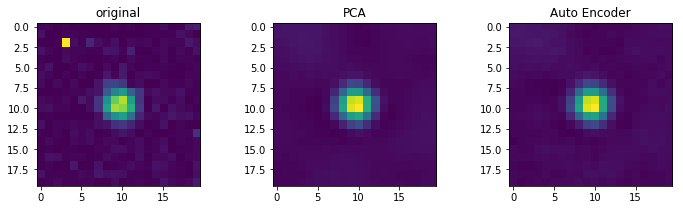

In [111]:
print('\nAuto Encoder better:\n')     
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.reshape(X_test[AE_better1,:],(20,20)))
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(np.reshape(decode2[AE_better1,:],(20,20)))
plt.title('PCA')
plt.subplot(1,3,3)
plt.imshow(np.reshape(predict2[AE_better1,:],(20,20)))
plt.title('Auto Encoder')
plt.show()


PCA better:



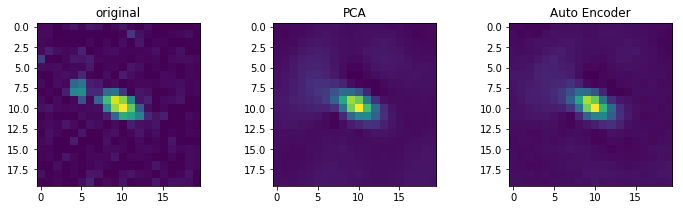

In [112]:
print('\nPCA better:\n')  
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.reshape(X_test[PCA_better,:],(20,20)))
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(np.reshape(decode2[PCA_better,:],(20,20)))
plt.title('PCA')
plt.subplot(1,3,3)
plt.imshow(np.reshape(predict2[PCA_better,:],(20,20)))
plt.title('Auto Encoder')
plt.show()

Conclusion:

For images with an x-axis perpendicular to the y-axis, auto encoder is better.

For images with a certain angle of inclination, PCA is better.
